In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pymongo
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

In [2]:
# Establish the remote connection to the mongo data base:
# myclient = pymongo.MongoClient("mongodb+srv://axme100:{}@cluster0-5jopz.mongodb.net/test?retryWrites=true&w=majority".format(mongoPass))
myclient = pymongo.MongoClient()

# This is the name of the cluster stored on mongo atlas
mydb = myclient["finalProject"]

# Create a new colection called efe articles
mycol = mydb["article_prepared_2"]

In [3]:
# This just gets every document in the database
def get_processed_corpus():
    cursor = mycol.find()
    for article in cursor:
        yield article['bag_of_words'][0]

In [4]:
# This just gets every document in the database
def get_processed_levels():
    cursor = mycol.find()
    for article in cursor:
        yield article['level_binary']

In [5]:
corpus_gen = get_processed_corpus()
level_gen = get_processed_levels()

In [6]:
# Break up the data into separate cateegories
X_train, X_test, y_train, y_test = train_test_split(list(corpus_gen), list(level_gen), test_size=0.2, random_state=101)

In [7]:
# Instantiate the tfdif vectorizer
# The first parameter normalizes the text into unicode
# The second parameter allows the vectorizer to consider bigrams
tfidf = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 2),max_df=0.9, min_df=3,sublinear_tf=True)

In [8]:
# Vectorize the training data
tf_idf_train = tfidf.fit_transform(X_train)

In [9]:
# Vectorize the test data
tf_idf_test = tfidf.transform(X_test)

In [10]:
# Initiate a logistic regression model
model = LogisticRegression()

In [11]:
# Fit the model to the training data
model.fit(tf_idf_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predict the test data
preds = model.predict(tf_idf_test)

In [13]:
# Calculate the accuracey of the predictions
accuracy = (preds==y_test).mean()

In [14]:
# Display the accuracey of the model
accuracy

0.7621326042378674

In [15]:
# This is the same as abov 
accuracy_score(y_test, preds)

0.7621326042378674

[[832  98]
 [250 283]]


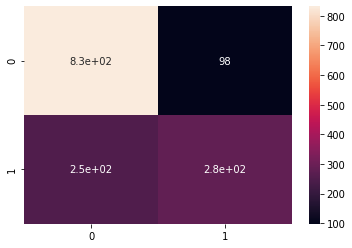

In [16]:
conf_m=confusion_matrix(y_test, preds)
print (conf_m)
sns.heatmap(conf_m, annot=True);

# Save model and vectorizer as pickle

In [17]:
with open('logistic_regression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [18]:
with open('tfidf_vectorizer.pickle', 'wb') as f:
    pickle.dump(tfidf, f)